In [5]:
!apt install libzbar0

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 ghostscript gsfonts imagemagick-6-common
  libdjvulibre-text libdjvulibre21 libfftw3-double3 libgs9 libgs9-common libidn12 libijs-0.35
  libjbig2dec0 libjxr-tools libjxr0 liblqr-1-0 libmagickcore-6.q16-6 libmagickcore-6.q16-6-extra
  libmagickwand-6.q16-6 libv4l-0 libv4lconvert0 libwmflite-0.2-7 poppler-data
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf fonts-texgyre ghostscript-x libfftw3-bin
  libfftw3-dev inkscape poppler-utils fonts-japanese-mincho | fonts-ipafont-mincho
  fonts-japanese-gothic | fonts-ipafont-gothic fonts-arphic-ukai fonts-arphic-uming fonts-nanum
The following NEW packages will be installed:
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 ghostscript gsfonts imagemagick-6-common
  libdjvulibre-text libdjvulibre21 libfftw3-doub

In [6]:
!pip install pyzbar

In [7]:
!pip install --upgrade pyzbar


In [8]:
from pyzbar.pyzbar import decode

In [10]:
import os

import cv2
import matplotlib.pyplot as plt
import numpy as np

In [25]:
#input_dir = 'C:\Users\satya\Downloads\QR_Code'
#input_dir= '/Users/satya/Downloads/QR_Code'
input_dir='/content/drive/MyDrive/QR_Code'

In [26]:
print(os.listdir(input_dir))

['download.png', 'download (2).png', 'download (1).png', 'download (4).png', 'download (3).png']


b'http://itunes.apple.com/us/app/encyclopaedia-britannica/id447919187?mt=8'
Rect(left=6, top=6, width=213, height=213)
[Point(x=6, y=6), Point(x=6, y=218), Point(x=219, y=219), Point(x=218, y=6)]


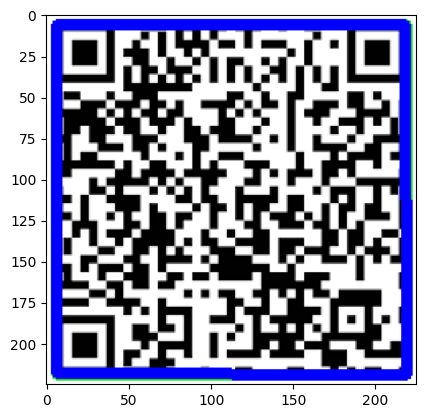

b'BCD\n001\n1\nSCT\nBPOTBEB1\nRed Cross\nBE72000000001616\nEUR1\nCHAR\n\nUrgency fund\nSample EPC QR Code\n'
Rect(left=17, top=17, width=190, height=190)
[Point(x=17, y=17), Point(x=17, y=207), Point(x=207, y=207), Point(x=207, y=17)]


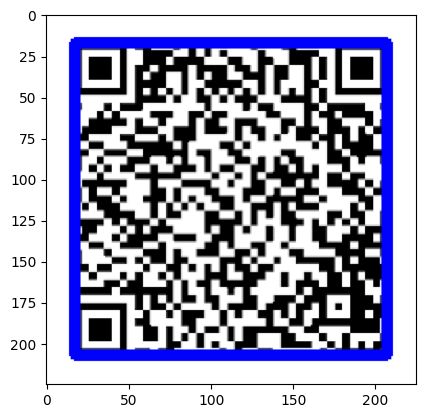

b'https://www.techopedia.com/'
Rect(left=22, top=21, width=183, height=183)
[Point(x=22, y=21), Point(x=22, y=203), Point(x=205, y=204), Point(x=204, y=21)]


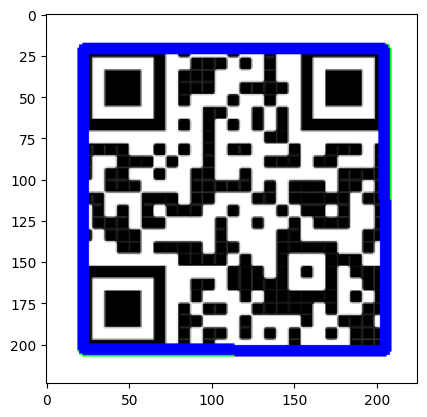

b'http://searchmobilecomputing.techtarget.com/definition/2D-barcode'
Rect(left=6, top=6, width=212, height=212)
[Point(x=6, y=6), Point(x=6, y=217), Point(x=218, y=218), Point(x=217, y=6)]


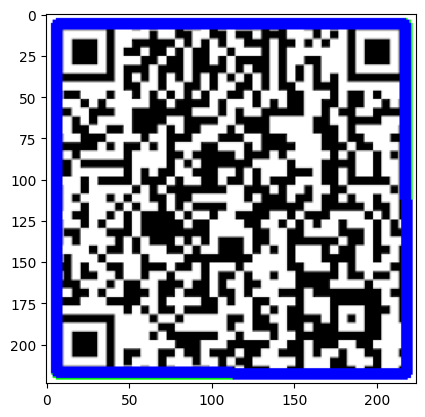

b'http://en.m.wikipedia.org'
Rect(left=24, top=24, width=177, height=177)
[Point(x=24, y=24), Point(x=24, y=201), Point(x=201, y=201), Point(x=201, y=24)]


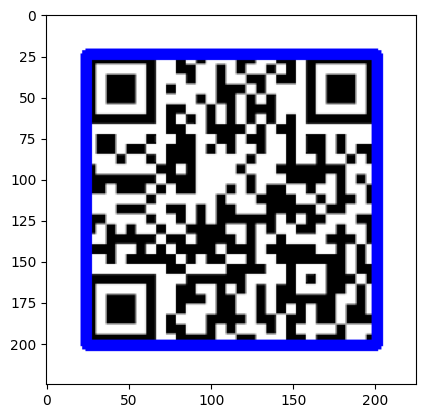

In [27]:


for j in sorted(os.listdir(input_dir)):
    img = cv2.imread(os.path.join(input_dir, j))

    qr_info = decode(img)

    for qr in qr_info:

        data = qr.data
        rect = qr.rect
        polygon = qr.polygon

        print(data)
        print(rect)
        print(polygon)

        img = cv2.rectangle(img, (rect.left, rect.top), (rect.left + rect.width, rect.top + rect.height),
                            (0, 255, 0), 5)

        img = cv2.polylines(img, [np.array(polygon)], True, (255, 0, 0), 5)

        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.show()

In [30]:
import os
import datetime
import time

import cv2
from pyzbar.pyzbar import decode
import matplotlib.pyplot as plt
import numpy as np




In [32]:
import os
print(os.getcwd())

/content


In [46]:
for i in range(4):
    cap = cv2.VideoCapture(i)
    if not cap.read()[0]:
        print(f"Camera {i} not available.")
    else:
        print(f"Camera {i} is available.")

Camera 0 not available.
Camera 1 not available.
Camera 2 not available.
Camera 3 not available.


<IPython.core.display.Javascript object>

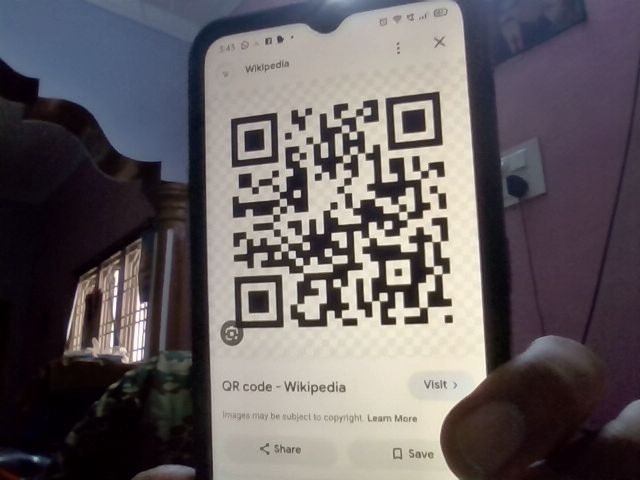

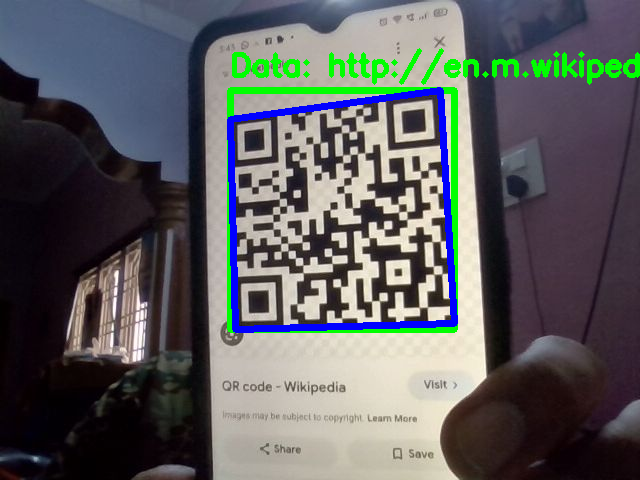

<IPython.core.display.Javascript object>

KeyboardInterrupt: ignored

In [53]:
import cv2
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript
from google.colab.output import eval_js
import numpy as np
import base64

# Function to capture a single image from the webcam
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);

            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({ 'video': true });

            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            // Resize the output to fit the video element.
            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

            // Wait for the Capture to be clicked.
            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getVideoTracks()[0].stop();
            div.remove();
            return canvas.toDataURL('image/jpeg', quality);
        }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))

    # Extract base64-encoded image data
    encoded_data = data.split(',')[1]

    # Decode base64 data
    binary_data = base64.b64decode(encoded_data)

    with open(filename, 'wb') as f:
        f.write(binary_data)
    return filename

# Capture a single image and display it
while True:
    try:
        # Take a photo and display it
        photo_data = take_photo()
        img = cv2.imread('photo.jpg')
        cv2_imshow(img)

        # Decode QR code
        qr_info = decode(img)

        for qr in qr_info:
            data = qr.data.decode()
            rect = qr.rect
            polygon = qr.polygon

            cv2.putText(img, f'Data: {data}', (rect.left, rect.top - 15), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 3)
            img = cv2.rectangle(img, (rect.left, rect.top), (rect.left + rect.width, rect.top + rect.height),
                                (0, 255, 0), 5)
            img = cv2.polylines(img, [np.array(polygon)], True, (255, 0, 0), 5)

        cv2_imshow(img)

    except Exception as e:
        print(f"Error: {e}")
